# 안녕하세요, 에이블러 여러분!
## AIVLE스쿨 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "버스 정류장 데이터" 를 확인해 보도록 하겠습니다

In [ ]:
# 필요 라이브러리부터 설치합니다.
# %pip install pandas seaborn

## 기본전제
* 제공되는 기본/추가 데이터는 '에이블러용' 폴더에 있습니다.

[기본 데이터]
* 1.1 bus_station_boarding_month_202401.csv

* 서울시 버스노선별 정류장별 승하차 인원 정보
* https://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do


[추가 데이터]
* 1.1 bus_station_202401.xlsx

* 서울시 버스정류장 위치정보
* https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터입니다.

###  데이터 프레임을 불러오고 변수로 저장(CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 sklearn 라이브러리를 통해 모델을 학습시키고 저장할 때 많이 사용, 파이썬의 모든 객체를 파일로 저장할 수 있다.

#### [실습문제1] 데이터 로딩
* Pandas 라이브러리를 활용해서 '1.1 bus_station_boarding_month_202401.csv'파일을 'bus_station' 변수에 저장하세요.
    * 데이터 파일 로딩시 참고 사항
        * 구분자(sep)는 ',' 입니다
        * cp949 인코더를 사용해 주세요

In [1]:
# 아래 실습코드를 실행해주세요.

import sys
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

bus_station = pd.read_csv('/content/drive/MyDrive/KTaivle/1차미니프로젝트/1.1 bus_station_boarding_month_202401.csv', sep=",", encoding = "cp949")

In [24]:
# 데이터 프레임의 Shape을 확인합니다.

bus_station.shape

(1048575, 8)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'bus_station' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보세요.

In [25]:
# head()
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20240101,101,101번(화계사~동대문),6178,대광고등학교앞(00055),39,76,20240104
1,20240101,9408,9408번(구미동차고지~고속터미널),22337,헌인마을.서울농업기술센터(00042),1,0,20240104
2,20240101,9408,9408번(구미동차고지~고속터미널),22336,헌인마을.서울농업기술센터(00078),2,0,20240104
3,20240101,9408,9408번(구미동차고지~고속터미널),22334,헌인릉.강남서초과학화예비군훈련장(00043),0,2,20240104
4,20240101,9408,9408번(구미동차고지~고속터미널),22333,헌인릉.강남서초과학화예비군훈련장(00076),2,1,20240104


In [26]:
# tail()
bus_station.tail()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
1048570,20240126,종로05,종로05(서대문역~배화여중고),1837,스위스대사관(00025),1,19,20240129
1048571,20240126,종로05,종로05(서대문역~배화여중고),1831,월암공원(00024),25,21,20240129
1048572,20240126,종로05,종로05(서대문역~배화여중고),1514,적십자병원후문앞(00002),9,6,20240129
1048573,20240126,성북07,성북07(정릉4동종점~길음역),8454,정릉4동종점(00014),0,181,20240129
1048574,20240126,종로05,종로05(서대문역~배화여중고),1587,신학대학교총회본부(00011),13,68,20240129


In [27]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# info()
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1048575 non-null  int64 
 1   노선번호        1048575 non-null  object
 2   노선명         1048575 non-null  object
 3   버스정류장ARS번호  1048575 non-null  object
 4   역명          1048575 non-null  object
 5   승차총승객수      1048575 non-null  int64 
 6   하차총승객수      1048575 non-null  int64 
 7   등록일자        1048575 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 64.0+ MB


In [28]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# describe()
bus_station.describe()

,사용일자,승차총승객수,하차총승객수,등록일자
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.024011e+07,1.030953e+02,1.010178e+02,2.024012e+07
std,7.455044e+00,1.486801e+02,1.348374e+02,7.455044e+00
min,2.024010e+07,0.000000e+00,0.000000e+00,2.024010e+07
25%,2.024011e+07,1.300000e+01,1.600000e+01,2.024011e+07
50%,2.024011e+07,5.700000e+01,6.200000e+01,2.024012e+07
75%,2.024012e+07,1.370000e+02,1.370000e+02,2.024012e+07
max,2.024013e+07,5.027000e+03,4.352000e+03,2.024013e+07


#### [실습문제3] 위 데이터에서 버스정류장 위치를 구 별로 구분 해보기

* 'bus_station' 데이터의 정보를 확인해보세요.

* 버스정류장 ARS번호의 앞 두자리가 구를 의미합니다.

* '자치구' column을 추가 -> 정류장이 위치한 구 이름을 등록


In [29]:
# "버스정류장ARS번호" 컬럼 확인하기
bus_station['버스정류장ARS번호']
print()

0           6178
1          22337
2          22336
3          22334
4          22333
           ...  
1048570     1837
1048571     1831
1048572     1514
1048573     8454
1048574     1587
Name: 버스정류장ARS번호, Length: 1048575, dtype: object

In [4]:
# "버스정류장ARS번호" 컬럼의 길이 계산
length_of_ars_numbers = bus_station['버스정류장ARS번호'].apply(lambda x: len(str(x)))

# 각 길이별 갯수 출력
length_counts = length_of_ars_numbers.value_counts()

# 결과 출력
print(length_counts)

5    748548
4    295601
1      4426
Name: 버스정류장ARS번호, dtype: int64


In [5]:
ars_numbers_length_1 = bus_station[bus_station['버스정류장ARS번호'].astype(str).apply(len) == 4]
print(ars_numbers_length_1)


             사용일자  노선번호               노선명 버스정류장ARS번호  \
0        20240101   101     101번(화계사~동대문)       6178   
146      20240101  9701    9701번(가좌동~서울역)       2694   
147      20240101  9701    9701번(가좌동~서울역)       2145   
148      20240101  9701    9701번(가좌동~서울역)       2140   
149      20240101  9701    9701번(가좌동~서울역)       2113   
...           ...   ...               ...        ...   
1048570  20240126  종로05  종로05(서대문역~배화여중고)       1837   
1048571  20240126  종로05  종로05(서대문역~배화여중고)       1831   
1048572  20240126  종로05  종로05(서대문역~배화여중고)       1514   
1048573  20240126  성북07  성북07(정릉4동종점~길음역)       8454   
1048574  20240126  종로05  종로05(서대문역~배화여중고)       1587   

                                역명  승차총승객수  하차총승객수      등록일자  
0                   대광고등학교앞(00055)      39      76  20240104  
146                     서울역(00066)      49      10  20240104  
147               남대문시장.회현역(00065)      32      33  20240104  
148                   롯데백화점(00064)      41      86  20240104  
149      서대문

In [6]:
bus_station['버스정류장ARS번호'] = bus_station['버스정류장ARS번호'].apply(lambda x: '0' + str(x) if len(str(x)) == 4 else str(x))

In [7]:
# "버스정류장ARS번호" 컬럼의 길이 계산
length_of_ars_numbers = bus_station['버스정류장ARS번호'].apply(lambda x: len(str(x)))

# 각 길이별 갯수 출력
length_counts = length_of_ars_numbers.value_counts()

# 결과 출력
print(length_counts)

5    1044149
1       4426
Name: 버스정류장ARS번호, dtype: int64


In [8]:
# 버스정류장 ARS번호에서 시작하는 앞자리 2개로 '자치구'라는 새로운 컬럼 생성
# str() : 정수나 실수를 문자열 형태로 바꿔주는 함수, slice()

bus_station['자치구'] = bus_station['버스정류장ARS번호'].apply(lambda x: str(x)[:2])

* 버스정류장 ARS 번호 : 01~25까지 앞 숫자 두개가 위치한 구를 의미
    01. 종로구
    02. 중구
    03. 용산구
    04. 성동구
    05. 광진구
    06. 동대문구
    07. 중랑구
    08. 성북구
    09. 강북구
    10. 도봉구
    11. 노원구
    12. 은평구
    13. 서대문구
    14. 마포구
    15. 양천구
    16. 강서구
    17. 구로구
    18. 금천구
    19. 영등포구
    20. 동작구
    21. 관악구
    22. 서초구
    23. 강남구
    24. 송파구
    25. 강동구

In [9]:
# 구 코드를 구 이름으로 변환하기
# map() : 리스트, 튜플 등 반복 가능한 데이터 집합을 입력으로 받아 변환하는 함수

bus_station['자치구'] = bus_station['자치구'].map({
    '01': '종로구',
    '02': '중구',
    '03': '용산구',
    '04': '성동구',
    '05': '광진구',
    '06': '동대문구',
    '07': '중랑구',
    '08': '성북구',
    '09': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'})


In [37]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# tail(10)

bus_station.tail(10)

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
1048565,20240126,종로05,종로05(서대문역~배화여중고),01849,강북삼성병원(00027),6,175,20240129,종로구
1048566,20240126,종로03,종로03(낙산공원~종로5가),01825,창신초교(00021),63,86,20240129,종로구
1048567,20240126,종로05,종로05(서대문역~배화여중고),01796,배화여중고.매동초교(00017),22,91,20240129,종로구
1048568,20240126,종로05,종로05(서대문역~배화여중고),01820,교남동주민센터(00022),7,25,20240129,종로구
1048569,20240126,종로05,종로05(서대문역~배화여중고),01554,독립문역3번출구(00006),343,191,20240129,종로구
1048570,20240126,종로05,종로05(서대문역~배화여중고),01837,스위스대사관(00025),1,19,20240129,종로구
1048571,20240126,종로05,종로05(서대문역~배화여중고),01831,월암공원(00024),25,21,20240129,종로구
1048572,20240126,종로05,종로05(서대문역~배화여중고),01514,적십자병원후문앞(00002),9,6,20240129,종로구
1048573,20240126,성북07,성북07(정릉4동종점~길음역),08454,정릉4동종점(00014),0,181,20240129,성북구
1048574,20240126,종로05,종로05(서대문역~배화여중고),01587,신학대학교총회본부(00011),13,68,20240129,종로구


#### [실습문제4] 결측치 처리하기



In [65]:
# (가상), (기점가상) 정류장은 ARS번호가 '~'로 나옵니다.
# (가상) 정류장 : 버스정보시스템 상에서 위치 정보를 표시하기 위해 임의로 가상의 정류장을 설정, 실제하지 않음
# '버스정류장ARS번호'가 '~'인 곳을 확인해주세요.

invalid_ars_numbers = bus_station[bus_station['버스정류장ARS번호'] == '~']
print(invalid_ars_numbers)

             사용일자  노선번호                      노선명 버스정류장ARS번호  \
699      20240101   441      441번(월암공영차고지~신사사거리)          ~   
1261     20240101  7021     7021번(은평공영차고지~롯데백화점)          ~   
1337     20240101  7017     7017번(은평공영차고지~롯데백화점)          ~   
1427     20240101  7016         7016번(은평차고지~상명대)          ~   
3332     20240101  750B         750B번(은평차고지~서울대)          ~   
...           ...   ...                      ...        ...   
1040945  20240126   271  271번(용마문화복지센터~월드컵파크7단지)          ~   
1040953  20240126   271  271번(용마문화복지센터~월드컵파크7단지)          ~   
1041836  20240126   N64    N64번(염곡공영차고지~강서공영차고지)          ~   
1042754  20240126   N72  N72중랑 (중랑공영차고지~은평공영차고지)          ~   
1043252  20240126   01A        01A번(예장주차장~예장주차장)          ~   

                               역명  승차총승객수  하차총승객수      등록일자  자치구  
699            월암차고지(종점가상)(00126)       0       1  20240104  NaN  
1261           은평공영차고지(가상)(00076)       0      10  20240104  NaN  
1337           은평공영차고지(가상)(00090)       0 

In [10]:
# NaN 값을 제거 해주세요.
# dropna()

bus_station = bus_station.dropna()

In [40]:
# 컬럼별 NaN 값이 있는지 확인, info()

bus_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960811 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   사용일자        960811 non-null  int64 
 1   노선번호        960811 non-null  object
 2   노선명         960811 non-null  object
 3   버스정류장ARS번호  960811 non-null  object
 4   역명          960811 non-null  object
 5   승차총승객수      960811 non-null  int64 
 6   하차총승객수      960811 non-null  int64 
 7   등록일자        960811 non-null  int64 
 8   자치구         960811 non-null  object
dtypes: int64(4), object(5)
memory usage: 73.3+ MB


In [11]:
# "버스정류장ARS번호" dtype을 정수형(int)으로 변경

bus_station['버스정류장ARS번호'] = bus_station['버스정류장ARS번호'].astype(int)

#### [실습문제5] 구별로 버스정류장의 개수 확인하기 (서울시)


In [12]:
# 자치구별 버스정류장 고유값들의 갯수를 출력하여 'bus_station_count' 변수로 저장
# nunique(), groupby()

bus_station_count = bus_station.groupby('자치구')['버스정류장ARS번호'].nunique()
print(bus_station_count)

자치구
강남구     501
강동구     367
강북구     410
강서구     567
관악구     468
광진구     280
구로구     486
금천구     347
노원구     496
도봉구     368
동대문구    308
동작구     441
마포구     565
서대문구    460
서초구     601
성동구     433
성북구     599
송파구     470
양천구     323
영등포구    467
용산구     326
은평구     497
종로구     357
중구      174
중랑구     428
Name: 버스정류장ARS번호, dtype: int64


In [13]:
# 중랑구에 428개의 버스정류장이 있다는데, 실제 ARS번호를 확인해봅시다.
# 자치구별 버스정류장 고유값들을 출력하여 'bus_staiton_unique' 변수로 저장
# 중랑구 버스정류장ARS번호 전체 출력

bus_station_unique = bus_station.groupby('자치구')['버스정류장ARS번호'].unique()
#print(bus_station_unique)

jongrogu_stations = bus_station_unique.get('중랑구')
print(len(jongrogu_stations))

428


In [14]:
# 서울 지역 외 '버스정류장ARS번호' 샘플 확인
# 중랑구의 버스정류장ARS번호 7674 인 정류장 확인해보기

sample_row = bus_station[(bus_station['자치구'] == '중랑구') & (bus_station['버스정류장ARS번호'] == 7674)]
print(sample_row)

             사용일자  노선번호                노선명  버스정류장ARS번호           역명  승차총승객수  \
43608    20240102  9409  9409번(구미동차고지~신사역)        7674  이우중고(00005)       1   
84449    20240103  9409  9409번(구미동차고지~신사역)        7674  이우중고(00005)       0   
206641   20240106  9409  9409번(구미동차고지~신사역)        7674  이우중고(00005)       3   
287124   20240108  9409  9409번(구미동차고지~신사역)        7674  이우중고(00005)       0   
327856   20240109  9409  9409번(구미동차고지~신사역)        7674  이우중고(00005)       1   
450342   20240112  9409  9409번(구미동차고지~신사역)        7674  이우중고(00005)       1   
612051   20240116  9409  9409번(구미동차고지~신사역)        7674  이우중고(00005)       0   
652849   20240117  9409  9409번(구미동차고지~신사역)        7674  이우중고(00005)       1   
693641   20240118  9409  9409번(구미동차고지~신사역)        7674  이우중고(00005)       0   
814818   20240121  9409  9409번(구미동차고지~신사역)        7674  이우중고(00005)       2   
855341   20240122  9409  9409번(구미동차고지~신사역)        7674  이우중고(00005)       0   
896148   20240123  9409  9409번(구미동차고지~신사역)        76

In [15]:
# 서울의 버스 정류장 데이터만 포함하고 있는 excel 파일 열기 ('/content/drive/MyDrive/KTaivle/1차미니프로젝트/1.1 bus_station_202401.xlsx')
# https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do (출처:서울열린데이터광장)
# 'only_seoul' 변수로 저장

import pandas as pd

# 엑셀 파일 경로
file_path = '/content/drive/MyDrive/KTaivle/1차미니프로젝트/1.1 bus_station_202401.xlsx'

# 엑셀 파일 읽어오기
bus_station2 = pd.read_excel(file_path)

# 'ARS_ID'가 '0101'부터 '2525'까지인 데이터만 추출
only_seoul = bus_station2[(bus_station2['ARS_ID'].astype(int) >= 1000) & (bus_station2['ARS_ID'].astype(int) <= 25999)]

# 결과 출력
print(only_seoul)


       ARS_ID           정류소명
0        1001        종로2가사거리
1        1002    창경궁.서울대학교병원
2        1003      명륜3가.성대입구
3        1004       종로2가.삼일교
4        1005  혜화동로터리.여운형활동터
...       ...            ...
11258   25995          우성아파트
11259   25996          우성아파트
11260   25997           조일약국
11261   25998           성내시장
11262   25999    천호우체국.로데오거리

[11263 rows x 2 columns]


In [55]:
# 데이터 구조 확인, info()

only_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11263 entries, 0 to 11262
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ARS_ID         11263 non-null  int64 
 1   정류소명           11263 non-null  object
 2   ARS_ID_length  11263 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 352.0+ KB


In [73]:
# 데이터 확인

print(only_seoul)

       ARS_ID           정류소명
0        1001        종로2가사거리
1        1002    창경궁.서울대학교병원
2        1003      명륜3가.성대입구
3        1004       종로2가.삼일교
4        1005  혜화동로터리.여운형활동터
...       ...            ...
11258   25995          우성아파트
11259   25996          우성아파트
11260   25997           조일약국
11261   25998           성내시장
11262   25999    천호우체국.로데오거리

[11263 rows x 2 columns]


In [16]:
# 서울 지역 외 '버스정류장ARS번호' 샘플 확인

others = bus_station2[(bus_station2['ARS_ID'].astype(int) < 1000) | (bus_station2['ARS_ID'].astype(int) > 25999)]
print(others)

Empty DataFrame
Columns: [ARS_ID, 정류소명]
Index: []


In [17]:
# 'ARS-ID'열 이름을 '버스정류장ARS번호'로 바꾸기

only_seoul = only_seoul.rename(columns={'ARS_ID': '버스정류장ARS번호'})

# 변경된 데이터프레임 확인
print(only_seoul)

       버스정류장ARS번호           정류소명
0            1001        종로2가사거리
1            1002    창경궁.서울대학교병원
2            1003      명륜3가.성대입구
3            1004       종로2가.삼일교
4            1005  혜화동로터리.여운형활동터
...           ...            ...
11258       25995          우성아파트
11259       25996          우성아파트
11260       25997           조일약국
11261       25998           성내시장
11262       25999    천호우체국.로데오거리

[11263 rows x 2 columns]


In [18]:
# 'only_seoul'과 'bus_station' 데이터 병합

merged_data = pd.merge(only_seoul, bus_station, on='버스정류장ARS번호', how='left')

# 병합된 데이터프레임 확인
print(merged_data)

        버스정류장ARS번호         정류소명        사용일자 노선번호                    노선명  \
0             1001      종로2가사거리  20240101.0  N37  N37번(송파공영차고지~진관공영차고지)   
1             1001      종로2가사거리  20240101.0  N37  N37번(진관공영차고지~송파공영차고지)   
2             1001      종로2가사거리  20240101.0  470       470번(상암차고지~안골마을)   
3             1001      종로2가사거리  20240101.0  741      741번(진관차고지~헌인릉입구)   
4             1001      종로2가사거리  20240102.0  N37  N37번(송파공영차고지~진관공영차고지)   
...            ...          ...         ...  ...                    ...   
958215       25995        우성아파트         NaN  NaN                    NaN   
958216       25996        우성아파트         NaN  NaN                    NaN   
958217       25997         조일약국         NaN  NaN                    NaN   
958218       25998         성내시장         NaN  NaN                    NaN   
958219       25999  천호우체국.로데오거리         NaN  NaN                    NaN   

                    역명  승차총승객수  하차총승객수        등록일자  자치구  
0       종로2가사거리(00032)     3.0     5.0  2

In [19]:
# 구 별로 버스 정류장의 개수 확인하기, 'seoul_bus_station_ARS' 변수로 저장

seoul_bus_station_ARS = merged_data.groupby('자치구')['버스정류장ARS번호'].nunique()

# 결과 출력
print(seoul_bus_station_ARS)

자치구
강남구     501
강동구     367
강북구     410
강서구     567
관악구     466
광진구     274
구로구     486
금천구     346
노원구     495
도봉구     366
동대문구    307
동작구     435
마포구     558
서대문구    456
서초구     601
성동구     432
성북구     595
송파구     470
양천구     319
영등포구    465
용산구     326
은평구     497
종로구     356
중구      173
중랑구     384
Name: 버스정류장ARS번호, dtype: int64


In [20]:
# 서울시에 있는 버스정류장 개수 구하기

total_bus_stations_seoul = merged_data['버스정류장ARS번호'].nunique()

# 결과 출력
print("서울시 전체 버스 정류장 개수:", total_bus_stations_seoul)

서울시 전체 버스 정류장 개수: 11263


#### [실습문제6] 구 별로 버스 노선의 개수 확인하기

In [21]:
# 자치구별 노선번호의 개수 구하기, 'seoul_bus_staion_line' 변수로 저장
seoul_bus_station_line = merged_data.groupby('자치구')['노선번호'].nunique().reset_index()

# 결과 출력
print(seoul_bus_station_line)

     자치구  노선번호
0    강남구    98
1    강동구    22
2    강북구    71
3    강서구    51
4    관악구    81
5    광진구    43
6    구로구    80
7    금천구    56
8    노원구    58
9    도봉구    54
10  동대문구    74
11   동작구    93
12   마포구   100
13  서대문구   109
14   서초구    99
15   성동구    58
16   성북구    98
17   송파구    60
18   양천구    57
19  영등포구   100
20   용산구    69
21   은평구    74
22   종로구   105
23    중구   102
24   중랑구    50


#### [실습문제7] 각 구별로 승차 총 승객수, 하차 총 승객수 구하기

In [22]:
# 자치구별 "승차총승객수","하차총승객수"의 합 구하기, 'seoul_bus_station_sum' 변수로 저장
# groupby()
seoul_bus_station_sum = merged_data.groupby('자치구')['승차총승객수', '하차총승객수'].sum().reset_index()

# 결과 출력
print(seoul_bus_station_sum)

<ipython-input-22-822127888f6a>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  seoul_bus_station_sum = merged_data.groupby('자치구')['승차총승객수', '하차총승객수'].sum().reset_index()


     자치구     승차총승객수     하차총승객수
0    강남구  6960336.0  6597087.0
1    강동구  2515582.0  2460905.0
2    강북구  3998077.0  3858057.0
3    강서구  3981173.0  3963283.0
4    관악구  5862490.0  5996915.0
5    광진구  2365355.0  2382437.0
6    구로구  4204229.0  4023135.0
7    금천구  3133461.0  3014364.0
8    노원구  3553485.0  3497450.0
9    도봉구  2771076.0  2695540.0
10  동대문구  4530373.0  4426822.0
11   동작구  4125466.0  3979142.0
12   마포구  4517711.0  4395035.0
13  서대문구  5069197.0  4978622.0
14   서초구  5919552.0  5755058.0
15   성동구  2371151.0  2331836.0
16   성북구  5051648.0  5060251.0
17   송파구  4746623.0  4744766.0
18   양천구  3478159.0  3344254.0
19  영등포구  4987187.0  5041026.0
20   용산구  3495720.0  3422432.0
21   은평구  4296944.0  4223666.0
22   종로구  4500874.0  4348356.0
23    중구  3138112.0  3050645.0
24   중랑구  3200879.0  3155827.0


#### [실습문제8] 각 구별 승차 평균 승객수, 하차 평균 승객수 구하기

In [23]:
# 자치구별 "승차총승객수","하차총승객수"의 평균 구하기, 'seoul_bus_station_mean' 변수로 저장
# '승차총승객수' -> '승차평균승객수', '하차총승객수' -> '하차평균승객수'로 열이름 변경

# 자치구별 "승차총승객수"과 "하차총승객수"의 평균 구하기
seoul_bus_station_mean = merged_data.groupby('자치구')['승차총승객수', '하차총승객수'].mean().reset_index()

# 열이름 변경
seoul_bus_station_mean = seoul_bus_station_mean.rename(columns={'승차총승객수': '승차평균승객수', '하차총승객수': '하차평균승객수'})

# 결과 출력
print(seoul_bus_station_mean)

     자치구     승차평균승객수     하차평균승객수
0    강남구  123.257234  116.824633
1    강동구   91.578944   89.588445
2    강북구  126.465395  122.036345
3    강서구   86.932767   86.542122
4    관악구  134.946712  138.040996
5    광진구  107.491706  108.267985
6    구로구  114.700415  109.759781
7    금천구  123.088384  118.410025
8    노원구   83.356439   82.041989
9    도봉구  101.649829   98.878985
10  동대문구  127.573018  124.657074
11   동작구  108.467845  104.620655
12   마포구   95.578543   92.983159
13  서대문구  104.720330  102.849216
14   서초구  113.621221  110.463886
15   성동구   90.495039   88.994581
16   성북구  112.288788  112.480017
17   송파구   99.003483   98.964751
18   양천구   96.452095   92.738804
19  영등포구  116.711217  117.971168
20   용산구  119.962938  117.447907
21   은평구   93.725603   92.127252
22   종로구  123.298104  119.119987
23    중구  113.699710  110.530616
24   중랑구   79.082866   77.969784


<ipython-input-23-f6ee150c3a88>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  seoul_bus_station_mean = merged_data.groupby('자치구')['승차총승객수', '하차총승객수'].mean().reset_index()


#### [실습문제9] 데이터 프레임 합치기

In [24]:
# 네 개 파일을 합쳐주세요.

# seoul_bus_station_ARS
# seoul_bus_station_line
# seoul_bus_station_sum
# seoul_bus_station_mean

# 네 개의 데이터프레임을 합치기
merged_all = pd.merge(seoul_bus_station_ARS, seoul_bus_station_line, on='자치구', how='outer')
merged_all = pd.merge(merged_all, seoul_bus_station_sum, on='자치구', how='outer')
merged_all = pd.merge(merged_all, seoul_bus_station_mean, on='자치구', how='outer')

# 결과 출력
print(merged_all)


     자치구  버스정류장ARS번호  노선번호     승차총승객수     하차총승객수     승차평균승객수     하차평균승객수
0    강남구         501    98  6960336.0  6597087.0  123.257234  116.824633
1    강동구         367    22  2515582.0  2460905.0   91.578944   89.588445
2    강북구         410    71  3998077.0  3858057.0  126.465395  122.036345
3    강서구         567    51  3981173.0  3963283.0   86.932767   86.542122
4    관악구         466    81  5862490.0  5996915.0  134.946712  138.040996
5    광진구         274    43  2365355.0  2382437.0  107.491706  108.267985
6    구로구         486    80  4204229.0  4023135.0  114.700415  109.759781
7    금천구         346    56  3133461.0  3014364.0  123.088384  118.410025
8    노원구         495    58  3553485.0  3497450.0   83.356439   82.041989
9    도봉구         366    54  2771076.0  2695540.0  101.649829   98.878985
10  동대문구         307    74  4530373.0  4426822.0  127.573018  124.657074
11   동작구         435    93  4125466.0  3979142.0  108.467845  104.620655
12   마포구         558   100  4517711.0  4395035.0   

In [25]:
# '버스정류장ARS번호' -> '정류장수', '노선번호' -> '노선수'로 열이름 변경
# 열 이름 변경
merged_all.rename(columns={'버스정류장ARS번호': '정류장수', '노선번호': '노선수'}, inplace=True)

# 변경된 결과 출력
print(merged_all)

     자치구  정류장수  노선수     승차총승객수     하차총승객수     승차평균승객수     하차평균승객수
0    강남구   501   98  6960336.0  6597087.0  123.257234  116.824633
1    강동구   367   22  2515582.0  2460905.0   91.578944   89.588445
2    강북구   410   71  3998077.0  3858057.0  126.465395  122.036345
3    강서구   567   51  3981173.0  3963283.0   86.932767   86.542122
4    관악구   466   81  5862490.0  5996915.0  134.946712  138.040996
5    광진구   274   43  2365355.0  2382437.0  107.491706  108.267985
6    구로구   486   80  4204229.0  4023135.0  114.700415  109.759781
7    금천구   346   56  3133461.0  3014364.0  123.088384  118.410025
8    노원구   495   58  3553485.0  3497450.0   83.356439   82.041989
9    도봉구   366   54  2771076.0  2695540.0  101.649829   98.878985
10  동대문구   307   74  4530373.0  4426822.0  127.573018  124.657074
11   동작구   435   93  4125466.0  3979142.0  108.467845  104.620655
12   마포구   558  100  4517711.0  4395035.0   95.578543   92.983159
13  서대문구   456  109  5069197.0  4978622.0  104.720330  102.849216
14   서초구  

In [26]:
# 데이터를 합친 결과를 확인합니다.

print(merged_all)

     자치구  정류장수  노선수     승차총승객수     하차총승객수     승차평균승객수     하차평균승객수
0    강남구   501   98  6960336.0  6597087.0  123.257234  116.824633
1    강동구   367   22  2515582.0  2460905.0   91.578944   89.588445
2    강북구   410   71  3998077.0  3858057.0  126.465395  122.036345
3    강서구   567   51  3981173.0  3963283.0   86.932767   86.542122
4    관악구   466   81  5862490.0  5996915.0  134.946712  138.040996
5    광진구   274   43  2365355.0  2382437.0  107.491706  108.267985
6    구로구   486   80  4204229.0  4023135.0  114.700415  109.759781
7    금천구   346   56  3133461.0  3014364.0  123.088384  118.410025
8    노원구   495   58  3553485.0  3497450.0   83.356439   82.041989
9    도봉구   366   54  2771076.0  2695540.0  101.649829   98.878985
10  동대문구   307   74  4530373.0  4426822.0  127.573018  124.657074
11   동작구   435   93  4125466.0  3979142.0  108.467845  104.620655
12   마포구   558  100  4517711.0  4395035.0   95.578543   92.983159
13  서대문구   456  109  5069197.0  4978622.0  104.720330  102.849216
14   서초구  

In [ ]:
# 해당 데이터프레임을 csv 파일로 저장하세요.



---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [103]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [27]:
# 시각화 한글폰트 설정
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.rc('font', family='Malgun')
# sns.set(font="Malgun Gothic",
#         rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
#         style='darkgrid')

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

#### [실습문제10] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

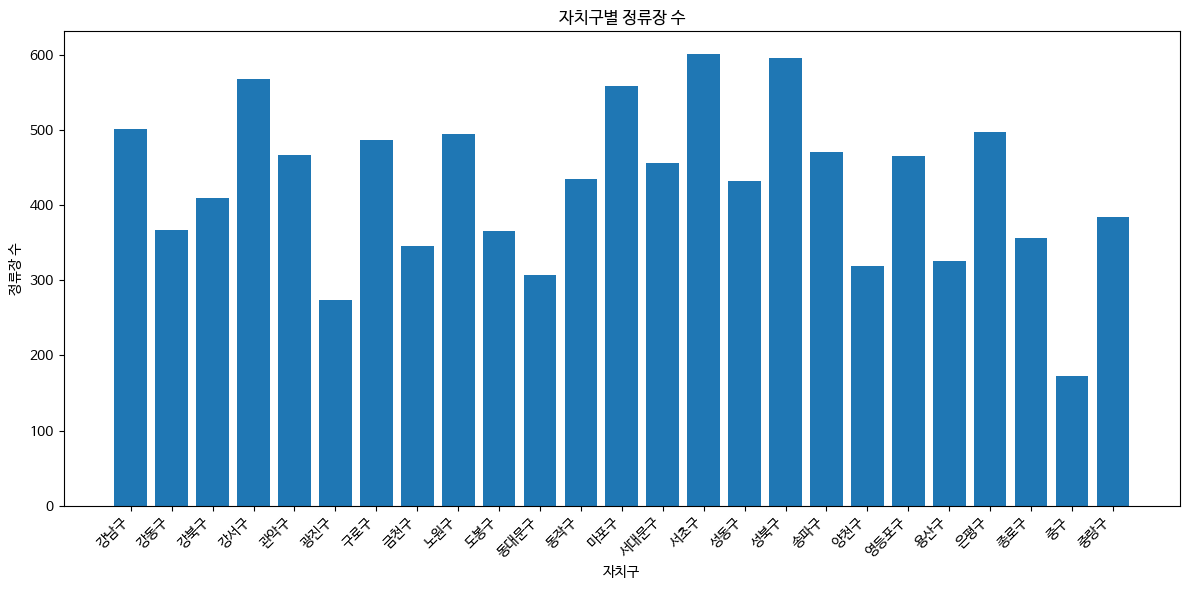

In [28]:
# 자치구별 정류장 수 그래프
plt.figure(figsize=(12, 6))
plt.bar(merged_all['자치구'], merged_all['정류장수'])
plt.title('자치구별 정류장 수')
plt.xlabel('자치구')
plt.ylabel('정류장 수')
plt.xticks(rotation=45, ha='right')  # x축 라벨 회전
plt.tight_layout()
plt.show()


In [ ]:
# 위 차트를 통해 알게된 사실을 개인별로 정리해봅시다.
# 1. 중구가 인구가 제일 적은 구인 만큼 정류장의 수가 가장 작았다. 하지만, 송파구가 가장 인구가 많다고 해서 정류장 수가 제일 많은 것도 아니였다.
# 2. 가장 많은 정류장을 가진 구는 서초구였다. 서초구가 서울에서 면적이 제일 큰 구이다. 면적과 정류장 수는 비례하는 것으로 봐도 좋겠다.
# 3. 강남구가 도로 면적이 가장 넓으나 정류장의 수가 제일 많지는 않았다. 아마, 자가용 및 택시를 이용하는 비중이 높아서이지 않을까 생각이 든다.

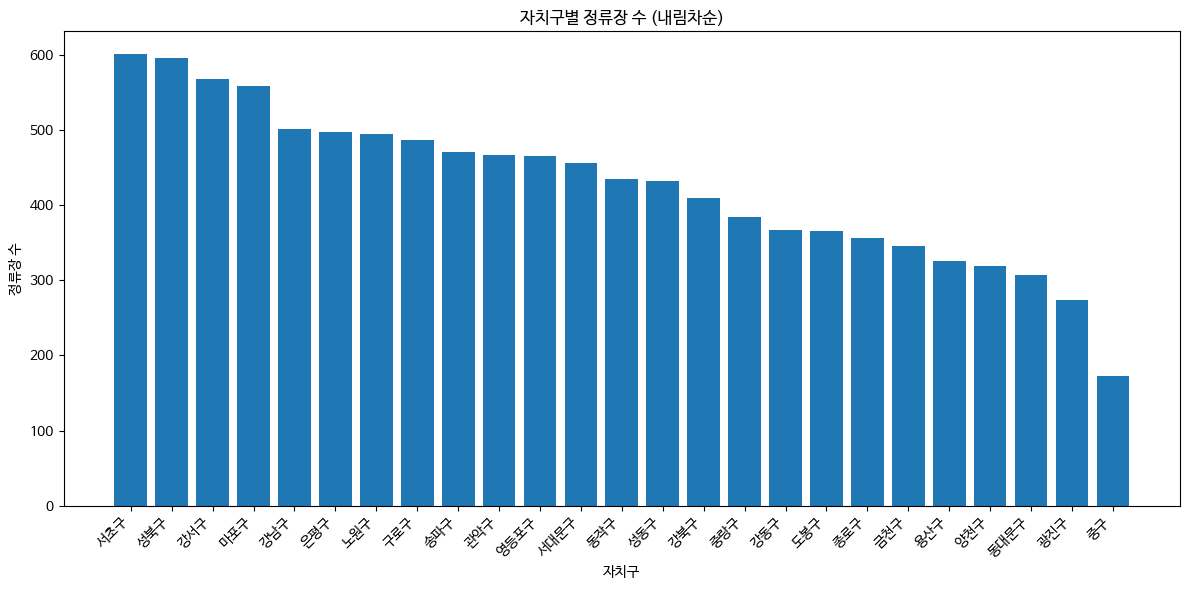

승차평균승객수 내림차순:
     자치구     승차평균승객수
4    관악구  134.946712
10  동대문구  127.573018
2    강북구  126.465395
22   종로구  123.298104
0    강남구  123.257234
7    금천구  123.088384
20   용산구  119.962938
19  영등포구  116.711217
6    구로구  114.700415
23    중구  113.699710
14   서초구  113.621221
16   성북구  112.288788
11   동작구  108.467845
5    광진구  107.491706
13  서대문구  104.720330
9    도봉구  101.649829
17   송파구   99.003483
18   양천구   96.452095
12   마포구   95.578543
21   은평구   93.725603
1    강동구   91.578944
15   성동구   90.495039
3    강서구   86.932767
8    노원구   83.356439
24   중랑구   79.082866

하차평균승객수 내림차순:
     자치구     하차평균승객수
4    관악구  138.040996
10  동대문구  124.657074
2    강북구  122.036345
22   종로구  119.119987
7    금천구  118.410025
19  영등포구  117.971168
20   용산구  117.447907
0    강남구  116.824633
16   성북구  112.480017
23    중구  110.530616
14   서초구  110.463886
6    구로구  109.759781
5    광진구  108.267985
11   동작구  104.620655
13  서대문구  102.849216
17   송파구   98.964751
9    도봉구   98.878985
12   마포구   92.983159
18   양천구   92.738804
21   

In [31]:
# 자치구별 정류장 수 내림차순 그래프
plt.figure(figsize=(12, 6))
sorted_merged_all = merged_all.sort_values(by='정류장수', ascending=False)
plt.bar(sorted_merged_all['자치구'], sorted_merged_all['정류장수'])
plt.title('자치구별 정류장 수 (내림차순)')
plt.xlabel('자치구')
plt.ylabel('정류장 수')
plt.xticks(rotation=45, ha='right')  # x축 라벨 회전
plt.tight_layout()
plt.show()

# 승차평균승객수 내림차순 출력
sorted_mean = merged_all.sort_values(by='승차평균승객수', ascending=False)
print("승차평균승객수 내림차순:")
print(sorted_mean[['자치구', '승차평균승객수']])

# 하차평균승객수 내림차순 출력
sorted_mean = merged_all.sort_values(by='하차평균승객수', ascending=False)
print("\n하차평균승객수 내림차순:")
print(sorted_mean[['자치구', '하차평균승객수']])

# 승차총승객수 내림차순 출력
sorted_sum = merged_all.sort_values(by='승차총승객수', ascending=False)
print("\n승차총승객수 내림차순:")
print(sorted_sum[['자치구', '승차총승객수']])

# 하차총승객수 내림차순 출력
sorted_sum = merged_all.sort_values(by='하차총승객수', ascending=False)
print("\n하차총승객수 내림차순:")
print(sorted_sum[['자치구', '하차총승객수']])

---